In [45]:
import numpy as np
import math
import random
from matplotlib import pyplot as plt


In [46]:
def generate_random(n1,n2):
    if n1>n2:
        print('first value should be smaller')
        return 0
    r = random.uniform(0,1)
    return n1+(n2-n1)*r

Monte carlo simulation to find area of circle

In [47]:
def dist(x,y):
    return math.sqrt(x**2+y**2)

2.4 10
3.2 100
3.136 1000
3.1744 10000
3.14416 100000
3.142152 1000000


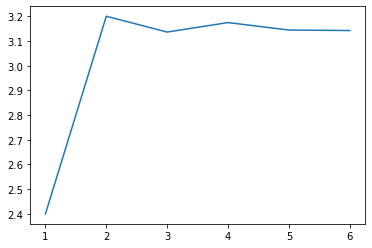

In [54]:
# finding value of pi by monte carlo method
R=1
Z=[]
for k in range(1,7):
    N=10**k
    z=0
    x=[]
    y=[]
    d=[]
#generate random points inside the sqaure
    for i in range(0,N):
        xi = generate_random(-R,R)
        yi= generate_random(-R,R)
        x.append(xi)
        y.append(yi)
        d.append(dist(xi,yi))
    
        if d[i]<R:
            z=z+1
    print(4*z/N,N)
    Z.append(4*z/N)
plt.plot(range(1,7),Z)

In [79]:
def f_of_x(x):
    """
    This is the main function we want to integrate over.
    Args:
    - x (float) : input to function; must be in radians
    Return:
    - output of function f(x) (float)
    """
    return ((math.e)**(-1*x))/(1+(x-1)**2)

In [97]:
#Numerical integration
X=100
N=100000
def numerical_int(num_samples,x_low,x_high,step):
    x=[]
    del_f = 0
    for i in range(N):
        del_f = del_f + (f_of_x(x_low+step/2))*step  
        x_low += step
    return del_f

numerical_int(N,0,100,0.01)

0.6960918269312018

In [98]:
from scipy.integrate import quad

res, err = quad(f_of_x, 0, 10)

print("The numerical result is {:f} (+-{:g})".format(res, err))

The numerical result is 0.696091 (+-5.08359e-14)


In [95]:
#Monte carlo integration
def monte_carlo(num_samples):
    lower_bound = 0
    upper_bound = 100
    
    sum_of_samples = 0
    for i in range(num_samples):
        x = generate_random(lower_bound, upper_bound)
        sum_of_samples += f_of_x(x)
    
    return (upper_bound - lower_bound) * float(sum_of_samples/num_samples)

In [96]:
monte_carlo(1000)

0.7143920080175342